# 1.Importing Libraries and Loading the Dataset

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Loading the dataset
diabetes_data = pd.read_csv('diabetes_dataset.csv')

#Checking the first few rows
print(diabetes_data.head())

#Displaying the columns in the dataset
print(diabetes_data.columns)

#Checking number of rows and columns
print(diabetes_data.shape)


   AGE Gender   FPG  HbA1c  Nocturia  Polyuria  Weight_loss  Vomiting  Nausea  \
0   52      F   7.0    6.7      True      True         True     False   False   
1   57      M  10.8    8.0     False     False        False     False   False   
2   56      F   3.6    5.0     False     False        False     False   False   
3   32      F   7.5    6.8     False     False        False     False   False   
4   51      M   5.7    6.2     False     False        False     False   False   

   Polydipsia  Polyphagia  Headache   BMI   Outcome  
0       False       False     False  31.0  positive  
1       False       False     False  32.0  positive  
2       False       False     False  23.0  negative  
3       False       False     False  31.0  positive  
4       False       False     False  20.0  negative  
Index(['AGE', 'Gender', 'FPG', 'HbA1c', 'Nocturia', 'Polyuria', 'Weight_loss',
       'Vomiting', 'Nausea', 'Polydipsia', 'Polyphagia', 'Headache', 'BMI',
       'Outcome'],
      dtype='ob

- 3415 rows and 14 columns
- **DataTypes**: Age, Gender, FPG(Fasting Plasma Glucose), HbA1c(Haemoglobin A1c Test), Nocturia, Polyuria, Weight Loss, Vomiting, Nausea, Polydipsia, Polyphagia, Headache, BMI, Outcome

#2. Checking and Handling the missing values
- Missing values at:
1. Gender: 1 (**Replaced with the most occuring gender**)
2. BMI: 7 (**Replaced using the Mean Method**)

In [19]:
#Check for missing values
print(diabetes_data.isnull().sum())
print("Missing Values in the dataset?")
print(diabetes_data.isnull().values.any())

#Replacing the missing values
diabetes_data['Gender'].fillna(diabetes_data['Gender'].mode()[0], inplace=True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].mean(), inplace=True)

#Checking first few rows
print(diabetes_data.head())


AGE            0
Gender         0
FPG            0
HbA1c          0
Nocturia       0
Polyuria       0
Weight_loss    0
Vomiting       0
Nausea         0
Polydipsia     0
Polyphagia     0
Headache       0
BMI            0
Outcome        0
dtype: int64
Missing Values in the dataset?
False
   AGE Gender   FPG  HbA1c  Nocturia  Polyuria  Weight_loss  Vomiting  Nausea  \
0   52      F   7.0    6.7      True      True         True     False   False   
1   57      M  10.8    8.0     False     False        False     False   False   
2   56      F   3.6    5.0     False     False        False     False   False   
3   32      F   7.5    6.8     False     False        False     False   False   
4   51      M   5.7    6.2     False     False        False     False   False   

   Polydipsia  Polyphagia  Headache   BMI   Outcome  
0       False       False     False  31.0  positive  
1       False       False     False  32.0  positive  
2       False       False     False  23.0  negative  
3       F

<ipython-input-19-3ddc6c92bf58>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_data['BMI'].fillna(diabetes_data['BMI'].mean(), inplace=True)


#3. Label encoding
- Converting Categorical Columns to Numeric Values e.g. Gender [M,F] before scaling.

In [25]:
#Check for non-numeric columns
non_numeric_columns = diabetes_data.select_dtypes(include=['object']).columns
print(non_numeric_columns)

#Label encoding the Gender column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
diabetes_data['Gender'] = le.fit_transform(diabetes_data['Gender'])

Index(['Outcome'], dtype='object')


#4. Data Visualization


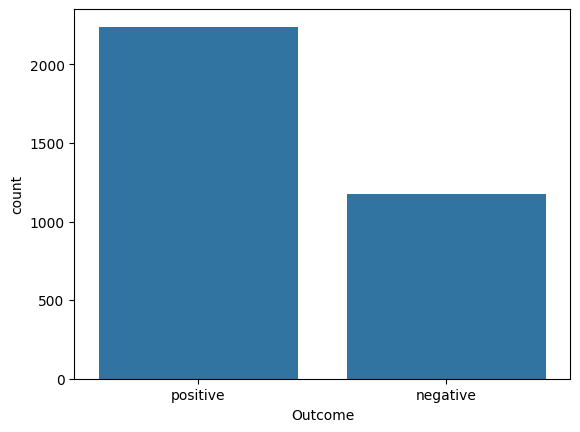

In [23]:
sns.countplot(x='Outcome', data=diabetes_data)
plt.show()

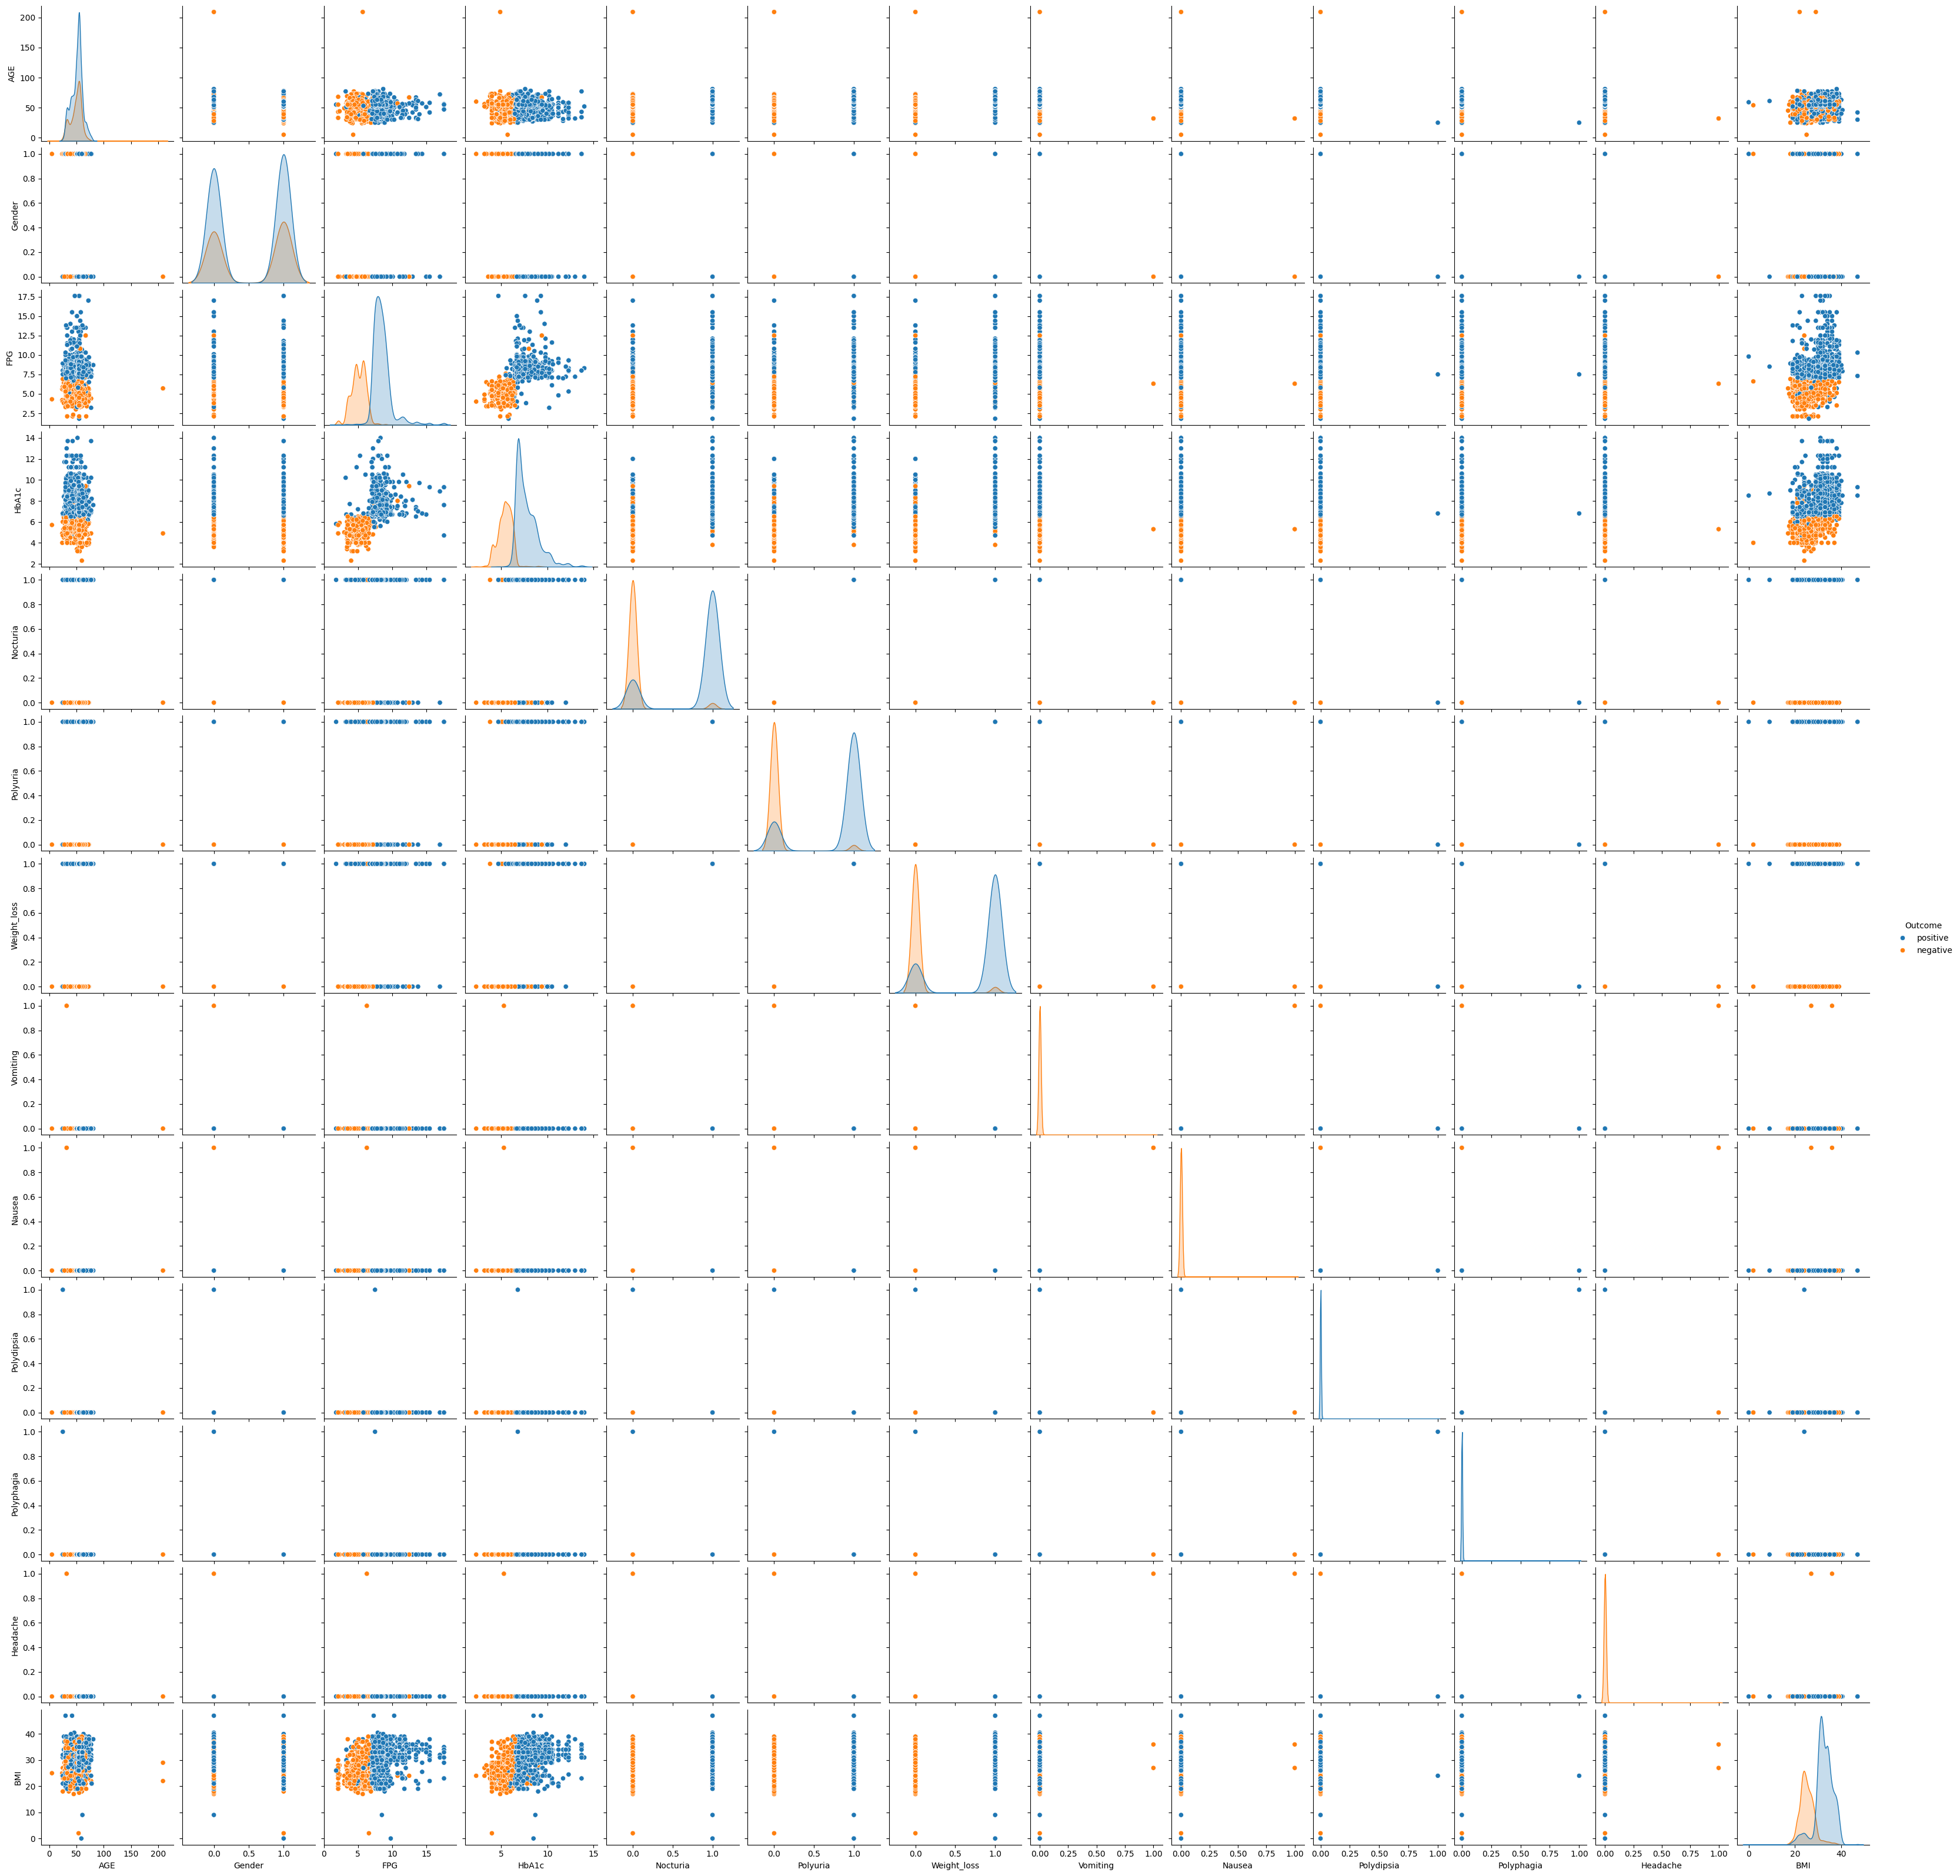

In [22]:
#Using pairplot
sns.pairplot(diabetes_data, hue='Outcome')
plt.show()

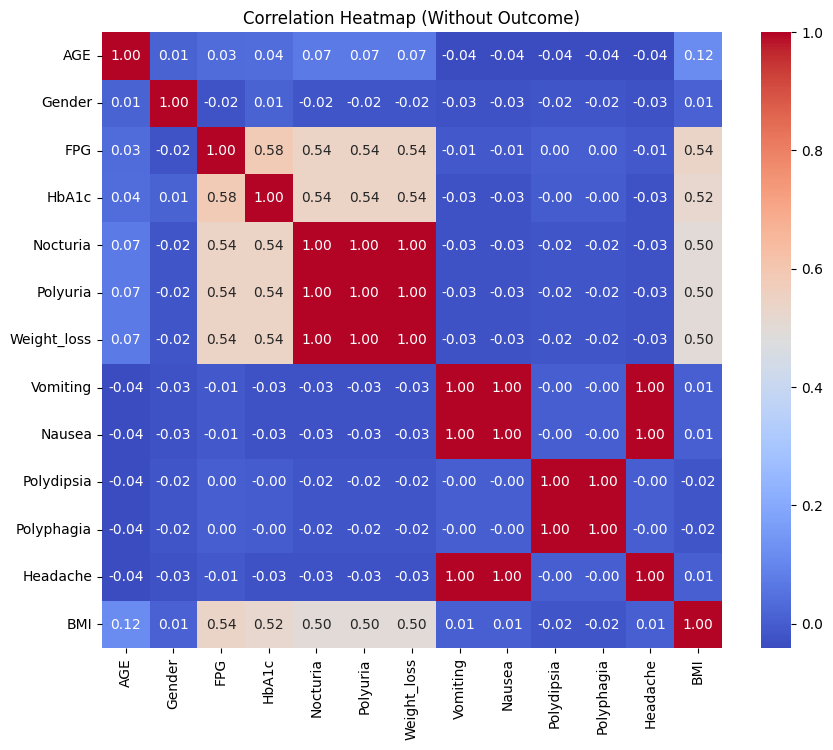

In [34]:
#Using Heatmap
#Dropping the 'Outcome' column
data_without_outcome = diabetes_data.drop('Outcome', axis=1)

#Calculating correlation matrix
correlation_matrix = data_without_outcome.corr()

#Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Without Outcome)')
plt.show()

#5. Splitting data into Features and Target
- Separating the features (input) and the target (output) variable.
- The **features** are the independent variables which the model will use to make predictions.
- The 'Outcome' column is the **target variable**, which is what the model will try to predict (**whether positive or negative**)

In [28]:
#Define features (x) and target (y)
x = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

#6. Splitting data into Training and Testing sets

In [29]:
# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#7. Data Scaling
- Standardizing the features to improve model performance

In [30]:
#Standardizing the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#8. Training the Model
- Using Random Classifier

In [31]:
#Initialize the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

#Train the model
model.fit(x_train_scaled, y_train)

RandomForestClassifier()

#9. Predictions

In [32]:
#Making Predictions
y_pred = model.predict(x_test_scaled)

#10. Evaluating the Model
- Using accuracy and classification report (precision, recall, F1-score)

In [33]:
#Evaluating the model
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9941434846266471

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       226
           1       0.99      1.00      1.00       457

    accuracy                           0.99       683
   macro avg       1.00      0.99      0.99       683
weighted avg       0.99      0.99      0.99       683


Confusion Matrix:
 [[222   4]
 [  0 457]]
